Explorations using the TreeGAMClassifier.

In [41]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics
from imodels import TreeGAMClassifier
import imodels
import dvu
dvu.set_style()
from tqdm import tqdm
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
X, y, feat_names = imodels.get_clean_dataset('heart')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

m = TreeGAMClassifier(n_boosting_rounds=10)
m.fit(X_train, y_train)
roc_auc  = metrics.roc_auc_score(y_test, m.predict_proba(X_test)[:,1])
acc = metrics.accuracy_score(y_test, m.predict(X_test))
print(f'ROC AUC: {roc_auc:.3f}, Accuracy: {acc:.3f}')

100%|██████████| 10/10 [00:00<00:00, 197.17it/s]

ROC AUC: 0.949, Accuracy: 0.759


In [43]:
p = X_train.shape[1]
z = np.zeros((1, p))
base = m.predict_proba(z)[:, 1][0]
x_vals_list = []
y_preds_list = []
for feat_num in tqdm(range(p)):
    z = np.zeros((1, p))
    x_vals = sorted(np.unique(X_train[:, feat_num]))
    y_preds = np.zeros_like(x_vals)
    for i, x in enumerate(x_vals):
        z[0, feat_num] = x
        y_preds[i] = m.predict_proba(z)[:, 1][0]
    x_vals_list.append(x_vals)
    y_preds_list.append(y_preds)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


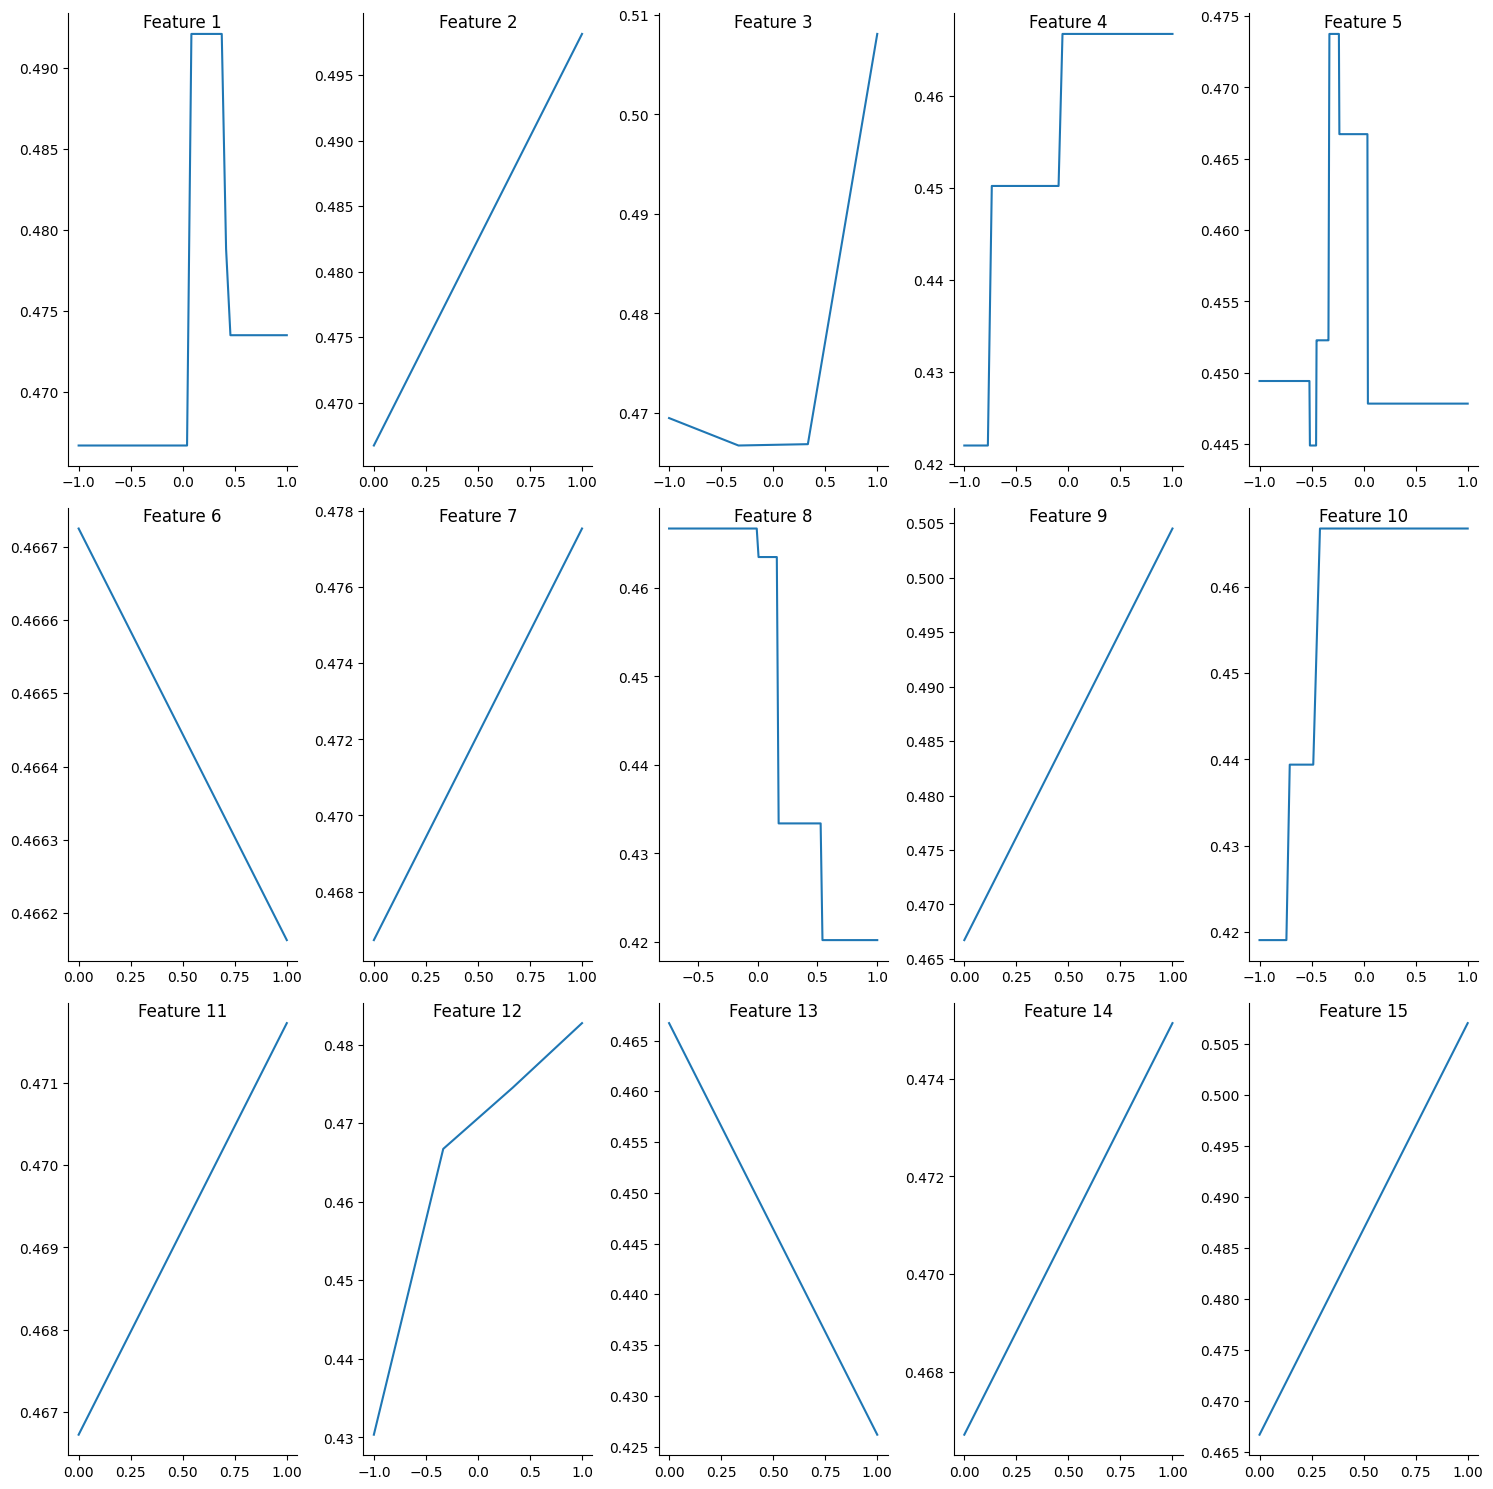

In [44]:
# plot them all
R = int(np.floor(np.sqrt(p)))
C = int(np.ceil(p / R))
plt.figure(figsize=(15, 15))
for feat_num in range(p):
    plt.subplot(R, C, feat_num + 1)
    plt.plot(
        x_vals_list[feat_num],
        y_preds_list[feat_num],
    )
    # add title inset in plot
    plt.title(
        f"Feature {feat_num + 1}",
        loc="center",
        y=1,
        pad=-10,
    )
plt.tight_layout()
plt.show()